In [50]:
%reset -f
import matplotlib.pyplot as plt
import os
import numpy as np
import parsing
import copy
import vertex
import time
import movement
import cell
import geometry
import data_holder
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
data = parsing.read_data(
    os.path.join("data", "network_vertices.txt"),
    os.path.join("data", "cell_indices.txt"), 
    5.5, 5.5, 1, 1, 0.0005
)

In [80]:
print(data.vert_list)
movement.move_vertices(data.vert_list, data)
print(data.vert_list)

[V(0.9444701592254267, 0.29090569024027163), V(0.1040951427393023, 0.8140866372260321), V(0.5645492681054558, 1.2248042894329534), V(0.3579566132255397, 1.8178776231462892), V(0.35781177094881805, 2.3114519848270167), V(0.631957756223704, 2.997222089834752), V(0.27646582983282636, 3.4672928689635576), V(5.4534554137163935, 4.6896762450647955), V(1.3965921054828434, 0.003530349315936654), V(1.3608578222478231, 1.07703090908762), V(1.1573098805724857, 1.5759303469122623), V(1.6118372119140831, 1.960240057548866), V(1.3460467721393528, 2.415911278936288), V(1.5704570147998091, 3.1207727652245607), V(1.05988119084402, 3.4843341574164826), V(1.3708227573591019, 3.770535505743804), V(2.117853981180217, 0.29169110831351575), V(2.4948512857935174, 1.0727537096163475), V(2.5912520297615704, 1.4949885865167045), V(2.180434084957183, 1.8864713074072381), V(2.5485037334705773, 2.5758786777197713), V(1.8519404500857575, 2.713448845431136), V(2.4918946714019303, 3.515762579759395), V(1.7867436385875

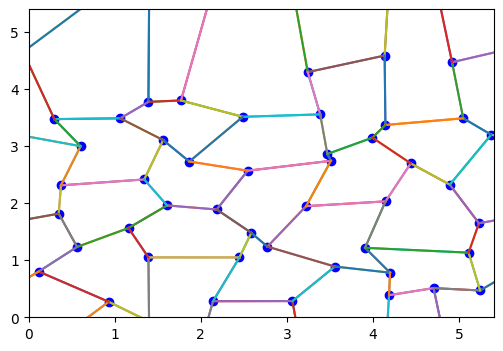

In [61]:
# This chunk graphs t = 0
# general setup
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0, 5.4)
plt.ylim(0, 5.4)
# graph vertices
for v in data.vert_list:
    plt.scatter(v.x, v.y, c = "blue")

# graph lines
for cell in data.cell_list:
    for i in range(len(cell.vert_obj_list)):
        x1 = cell.vert_obj_list[i].x
        y1 = cell.vert_obj_list[i].y
        x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
        y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
        # if any boundaries broken, must check which boundaries
        # then draw 2 segments connecting to the edge of the border
        if abs(x1 - x2) > data.lx / 2 or abs(y1 - y2) > data.ly / 2:
            # segment 1
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x2 += data.lx
                else:
                    x1 += data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y2 += data.lx
                else:
                    y1 += data.lx
            ax.plot([x1, x2],
                    [y1, y2])
            # segment 2
            x1 = cell.vert_obj_list[i].x
            y1 = cell.vert_obj_list[i].y
            x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
            y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x1 -= data.lx
                else:
                    x2 -= data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y1 -= data.lx
                else:
                    y2 -= data.lx
            ax.plot([x1, x2],
                    [y1, y2])
        # no boundaries broken
        # when no periodic boundaries broken, just draw one segment
        else:
            ax.plot([x1, x2],
                    [y1, y2])

In [62]:
movement.move_vertices(data.vert_list, data)

In [63]:
print(data.vert_list)

[V(1.0649173408192247, 0.46133237631878876), V(5.49334112998568, 0.9177632289771638), V(0.5757013135005955, 1.1457505430494679), V(0.42775782269514484, 1.8245675196920645), V(0.20137525168576373, 2.2957675008867886), V(0.8771474965880766, 2.9757197783094744), V(0.07799812198331926, 3.407157868644386), V(5.469175632446609, 5.1392436036606854), V(1.554092734849721, 5.367595141544844), V(1.2541878290008657, 1.1414540734471736), V(1.1318924698707384, 1.6775334233294539), V(1.6436819138549654, 1.9532493841555782), V(1.3772445802592421, 2.4100269290385143), V(1.6364049319166756, 3.248496200577469), V(1.01923658681495, 3.4523654119425347), V(1.3782110804333478, 4.152481293376573), V(1.914369408326363, 0.38077728963054297), V(2.6773630297304645, 1.1196548688502272), V(2.6342094995171133, 1.6206553977021723), V(2.148146532697996, 1.854613887362216), V(2.590502563883156, 2.6297830376661837), V(1.7222821923869394, 2.5623322427755086), V(2.5336477579970755, 3.5265369698184785), V(1.703616780004609

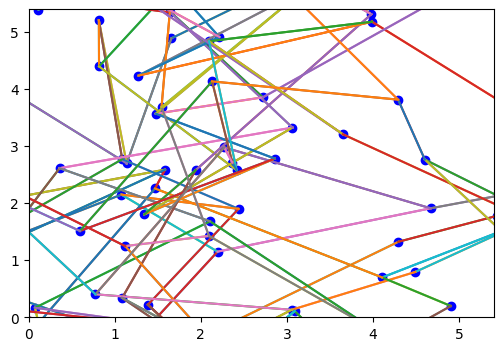

In [59]:
movement.move_vertices(data.vert_list, data)
# This chunk graphs t = 0
# general setup
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0, 5.4)
plt.ylim(0, 5.4)
# graph vertices
for v in data.vert_list:
    plt.scatter(v.x, v.y, c = "blue")

# graph lines
for cell in data.cell_list:
    # xcoords = []
    # ycoords = []
    # # generate list of x coords
    # for i in range(len(cell.vert_obj_list)):
    #     xcoords.append(cell.vert_obj_list[i].x)
    # xcoords.append(cell.vert_obj_list[0].x)
    # # generate list of y coords
    # for i in range(len(cell.vert_obj_list)):
    #     ycoords.append(cell.vert_obj_list[i].y)
    # ycoords.append(cell.vert_obj_list[0].y)
    # ax.plot(xcoords, ycoords)
    for i in range(len(cell.vert_obj_list)):
        x1 = cell.vert_obj_list[i].x
        y1 = cell.vert_obj_list[i].y
        x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
        y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
        # if any boundaries broken, must check which boundaries
        # then draw 2 segments connecting to the edge of the border
        if abs(x1 - x2) > data.lx / 2 or abs(y1 - y2) > data.ly / 2:
            # segment 1
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x2 += data.lx
                else:
                    x1 += data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y2 += data.lx
                else:
                    y1 += data.lx
            ax.plot([x1, x2],
                    [y1, y2])
            # segment 2
            x1 = cell.vert_obj_list[i].x
            y1 = cell.vert_obj_list[i].y
            x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
            y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x1 -= data.lx
                else:
                    x2 -= data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y1 -= data.lx
                else:
                    y2 -= data.lx
            ax.plot([x1, x2],
                    [y1, y2])
        # no boundaries broken
        # when no periodic boundaries broken, just draw one segment
        else:
            ax.plot([x1, x2],
                    [y1, y2])
            


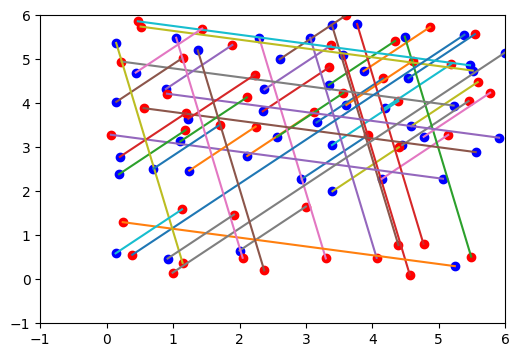

In [53]:
# Testing move

# # general setup
# fig = plt.figure(figsize = (6,4))
# ax = fig.add_subplot(1, 1, 1)
# plt.xlim(-1, 6)
# plt.ylim(-1, 6)
# # graph vertices
# for v in data.vert_list:
#     plt.scatter(v.x, v.y, c = "blue")

# old_list = copy.deepcopy(data.vert_list)

# movement.move_vertices(data.vert_list, data)

# for v in data.vert_list:
#     plt.scatter(v.x, v.y, c = "red")

# for old, new in zip(old_list, data.vert_list):
#     ax.plot([old.x, new.x], [old.y, new.y])

In [20]:
# Testing vertex_boundary_check
v = [vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     ]

In [32]:
v2 = np.zeros([50,2])
v2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [35]:
len(v2)

50

In [36]:
start = time.time()
for vert in v:
    vert.x += 1
    vert.y += 1
end = time.time() - start
print(end * 1000)
start = time.time()
for i in range(len(v2)):
    v2[[1, 3, 5, 6, 7, 8]]
end = time.time() - start
print(end * 1000)
    

0.06508827209472656
0.7388591766357422


In [3]:
v1 = [1, 1]
v2 = [4, 1]

In [4]:
hi = data_holder.Data_Holder(None, None)
geometry.__vertex_boundary_check(v1, v2, hi)

[-1, 1]

In [5]:
geometry.create_polygon(v, hi)

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [6]:
v

[V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [7]:
geometry.distance_formula([0,0], [1,1])

1.4142135623730951

In [8]:
joe = cell.Cell(v, hi)
joe

Polygon with vertices: [V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [9]:
joe.fake_polygon

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [ ]:
type(joe.area)

: 

In [11]:
joe.perimeter

8.0

In [12]:
joe.get_area()

In [ ]:
zed = 4
zed /= 1
zed

: 

In [ ]:
5 % 5

: 

NameError: name 'jljkljj' is not defined

In [31]:
arr = np.array([[1, 1], [1, 2]])

In [38]:
newarr = arr[np.any(arr == 2, axis = 1)]

In [39]:
newarr

array([[1, 2]])

In [40]:
np.any(arr == 2, axis = 1)

array([False,  True])

In [44]:
j = np.array([[2, 1],
          [3,4],
          [5, 1]])

In [45]:
j2 = j.view()

In [46]:
j2

array([[2, 1],
       [3, 4],
       [5, 1]])

In [47]:
j2[2][0] = 1

In [48]:
j2

array([[2, 1],
       [3, 4],
       [1, 1]])

In [49]:
j

array([[2, 1],
       [3, 4],
       [1, 1]])

In [27]:
j3 = j.view()

NameError: name 'j' is not defined

In [33]:
test = dict()
test["v"] = "hi"
test

{'v': 'hi'}

In [37]:
v1 = vertex.Vertex(1,3)
v2 = vertex.Vertex(1,3)
v1 == v2

True

In [42]:
z = np.array([1, 2]) * 2 + np.array([1, 1])


np.float64(10.2)

In [48]:
z += np.array([1, 1])
